In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv(r"cruise_dataset CLEANED.csv")

data.head()
data.dtypes

Ship_name             object
Cruise_line           object
Age                    int64
Tonnage              float64
Passengers           float64
Length               float64
Cabins               float64
Passenger_density    float64
Crew                 float64
dtype: object

In [2]:
data['Emissions'] = data['Tonnage'] * 0.4 + data['Passengers'] * 0.2
data['Fuel_consumption'] = data['Tonnage'] * 0.5 + data['Passengers'] * 0.3

data.head()

,Ship_name,Cruise_line,Age,Tonnage,Passengers,Length,Cabins,Passenger_density,Crew,Emissions,Fuel_consumption
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,13.4988,17.2205
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,13.4988,17.2205
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,21.8768,28.0890
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,49.9480,63.9220
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,45.8252,58.6025


In [3]:
df = pd.DataFrame(data)

# Regression for Fuel Consumption
X = df[['Tonnage', 'Passengers']]
y = df['Fuel_consumption']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

# Regression for Emissions
y = df['Emissions']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Fuel_consumption   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.449e+31
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:22:35   Log-Likelihood:                 4735.0
No. Observations:                 158   AIC:                            -9464.
Df Residuals:                     155   BIC:                            -9455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e-15    4.1e-15      0.433      0.6

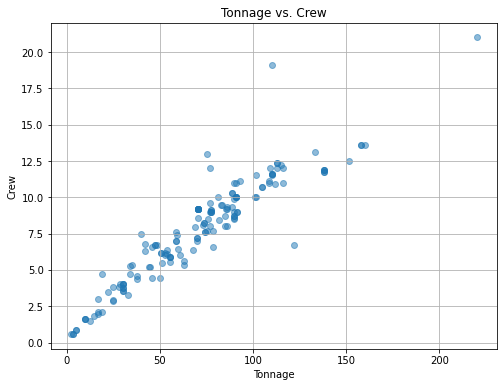

In [4]:
# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting Tonnage vs. Crew
plt.figure(figsize=(8, 6))
plt.scatter(df['Tonnage'], df['Crew'], alpha=0.5)
plt.title('Tonnage vs. Crew')
plt.xlabel('Tonnage')
plt.ylabel('Crew')
plt.grid(True)
plt.show()

In [5]:
##Discuss how ship size (tonnage) influences crew requirements. Larger ships typically require more crew to operate efficiently.

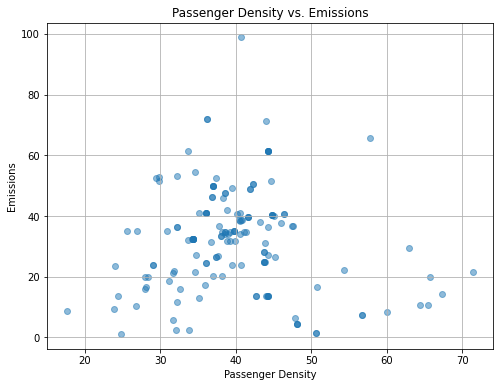

In [6]:
# Plotting Passenger Density vs. Emissions
plt.figure(figsize=(8, 6))
plt.scatter(df['Passenger_density'], df['Emissions'], alpha=0.5)
plt.title('Passenger Density vs. Emissions')
plt.xlabel('Passenger Density')
plt.ylabel('Emissions')
plt.grid(True)
plt.show()

In [7]:
##Explore the relationship between passenger density and emissions. Higher passenger density can lead to increased emissions per passenger mile traveled.

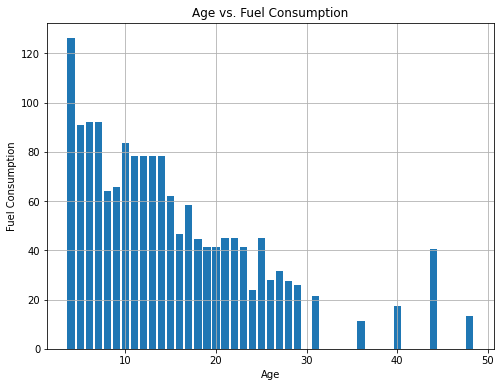

In [8]:
# Plotting Age vs. Fuel Consumption
plt.figure(figsize=(8, 6))
plt.bar(df['Age'], df['Fuel_consumption'])
plt.title('Age vs. Fuel Consumption')
plt.xlabel('Age')
plt.ylabel('Fuel Consumption')
plt.grid(True)
plt.show()

In [9]:
##Analyze how the age of a ship impacts fuel consumption. Older ships may have outdated technologies that contribute to higher fuel consumption rates.